# Regresion Logística Simple


In [1]:
import warnings
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
# Cargar datos
df = pd.read_csv("Data/robot_wall_follower/wall_robot_01.csv")

In [3]:
df.sample(n=10,random_state=567)

,sd_front,sd_left,sd_right,sd_back,target_Move-Forward,target_Sharp-Right-Turn,target_Slight-Right-Turn
5105,1.565,0.758,1.612,0.692,1,0,0
5224,3.281,0.800,1.455,0.433,1,0,0
4610,0.822,0.545,2.443,5.000,0,1,0
4379,2.391,0.464,1.831,1.316,0,0,1
3654,0.895,0.785,1.325,0.845,0,1,0
711,2.549,0.599,1.633,0.889,1,0,0
189,0.865,0.488,3.207,1.347,0,1,0
3944,0.770,0.798,2.751,4.334,0,1,0
1086,0.852,0.471,1.755,1.338,0,1,0
3995,2.662,0.697,2.719,0.948,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sd_front                  5456 non-null   float64
 1   sd_left                   5456 non-null   float64
 2   sd_right                  5456 non-null   float64
 3   sd_back                   5456 non-null   float64
 4   target_Move-Forward       5456 non-null   int64  
 5   target_Sharp-Right-Turn   5456 non-null   int64  
 6   target_Slight-Right-Turn  5456 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 298.5 KB


Se realiza una regresión logistica simple. A partir del valor del sensor ubicado en el frente del robot `sd_front` puedo predecir si el robot se mueve hacia adelante `target_Move-Forward`

In [5]:
# Datos de entrada y entrenamiento
input = df[['sd_front']]
input.head()

,sd_front
0,1.687
1,1.687
2,1.687
3,1.687
4,1.687


In [6]:
output = df['target_Move-Forward']
output.head()

0    0
1    0
2    0
3    0
4    0
Name: target_Move-Forward, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [8]:
# Crear modelo de regresión logística
reg_log_simple = LogisticRegression()

In [9]:
# Entrenar el modelo
reg_log_simple.fit(input, output)

LogisticRegression()

In [10]:
# Obener el valor de theta(1)
reg_log_simple.coef_

array([[1.51386924]])

In [11]:
# Obtener el valor de theta(0)
reg_log_simple.intercept_

array([-2.33604707])

## Modelo por Logit

In [12]:
# Importar el modulo statsmodel para poder crear la constante que requiere el modelo Logit
import statsmodels.api as sn

In [13]:
const_X = sn.add_constant(input)
const_X

,const,sd_front
0,1.0,1.687
1,1.0,1.687
2,1.0,1.687
3,1.0,1.687
4,1.0,1.687
...,...,...
5451,1.0,1.024
5452,1.0,0.894
5453,1.0,0.873
5454,1.0,0.967


In [14]:
# Importar el modulo para trabajar con variables discretas con Logit
import statsmodels.discrete.discrete_model as sm

In [15]:
# Entrenar y ajustar el modelo a los datos de entrada
logit = sm.Logit(output, const_X).fit()


Optimization terminated successfully.
         Current function value: 0.593892
         Iterations 6


In [16]:
# Obtener el resumen del modelo
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     target_Move-Forward   No. Observations:                 5456
Model:                           Logit   Df Residuals:                     5454
Method:                            MLE   Df Model:                            1
Date:                 Tue, 26 Oct 2021   Pseudo R-squ.:                  0.1197
Time:                         11:54:47   Log-Likelihood:                -3240.3
converged:                        True   LL-Null:                       -3680.9
Covariance Type:             nonrobust   LLR p-value:                1.145e-193
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3428      0.081    -29.060      0.000      -2.501      -2.185
sd_front       1.5193      0.060     25.405      0.000       1.402       1.636
==============================================================================
"""

## Análisis de los resultados

$R^2$ : 0.1197

$p-value$ : 1.145e-193

In [17]:
# Realizar una predicción de ejemplo
np.floor(logit.predict([1, 0.989])[0])

0.0

In [19]:
## Gráfica del modelo de regresion logística
# Crear los puntos necesarios de la variable predicha desarrollar la gráfica

grilla_X = np.linspace(
    start=-100,  # min(df.precio),
    stop=100,  # max(df.precio),
    num=500
).reshape(-1, 1)  # reshape -> una columna y determina cuantas columnas debe poner

# Agregar la constante para poder desarrollar la predicción por el modelo Logit
grilla_X = sn.add_constant(grilla_X, prepend=True)

# Desarrollar la predicción
prediccion = logit.predict(exog=grilla_X)


In [20]:
grilla_X.shape  # El resultado es un vector de 500 x 2

(500, 2)

Text(0.5, 0, 'sd_front')

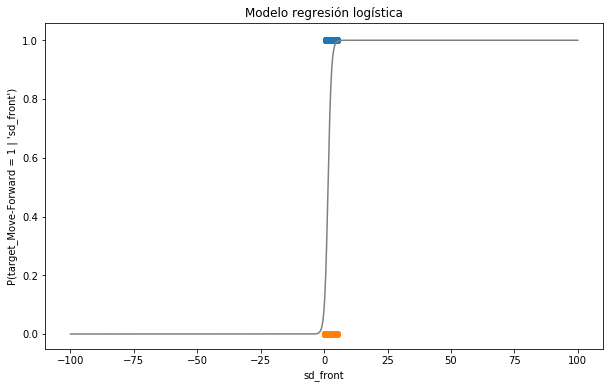

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
# Nube de puntos para cuando la propiedad es vendida
ax.scatter(
    x=df[['sd_front']][(output == 1)].to_numpy().flatten(), y=df[['target_Move-Forward']][output == 1].to_numpy().flatten()
)
# to_numpy pasa array y flattern a que sea unidimensional

# Nube de puntos para el caso en que la propiedad no es vendida
ax.scatter(
    x=df[['sd_front']][(output == 0)].to_numpy().flatten(), y=df[['target_Move-Forward']][output == 0].to_numpy().flatten()
)

# Segunda columna de la grilla
ax.plot(grilla_X[:500, 1], prediccion, color="gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(target_Move-Forward = 1 | 'sd_front')")
ax.set_xlabel("sd_front")


# Regresión Logistica multiple

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df.head()

,sd_front,sd_left,sd_right,sd_back,target_Move-Forward,target_Sharp-Right-Turn,target_Slight-Right-Turn
0,1.687,0.445,2.332,0.429,0,0,1
1,1.687,0.449,2.332,0.429,0,0,1
2,1.687,0.449,2.334,0.429,0,0,1
3,1.687,0.449,2.334,0.429,0,0,1
4,1.687,0.449,2.334,0.429,0,0,1


In [ ]:
X = df.loc[:, df.columns != 'target_Move-Forward']  # array numpy
y = df['target_Move-Forward']  # serie

In [ ]:
# Obtener los cuatro conjuntos de datos necesarios para el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [ ]:
# Crear el modelo aumentando las iteraciones dado que no se llega
# a ajustar el modelo con menos iteraciones
reg_model = LogisticRegression(max_iter=900)
# por defecto tiene 100 como max_iter
##por defecto usa regularización como hacer sin regularizacion?

In [ ]:
# Ajustar el modelo a los datos
reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [ ]:
# Intercepto theta(0)
reg_model.intercept_

array([8.11295565])

In [ ]:
# Coeficiente de las variables predictoras
reg_model.coef_.reshape(-1, 6)

array([[ 0.54361235, -8.04057233,  0.39494619, -0.54080824, -9.47448595,
        -9.97390688]])

In [ ]:
# prediccion en el conjunto de test
y_pred = reg_model.predict(X_test)

In [ ]:
## Se hace conversion a bool
y_pred.astype(bool), y_test.to_numpy().astype(bool)

(array([False,  True,  True, ...,  True, False, False]),
 array([False,  True,  True, ...,  True, False, False]))

In [ ]:
# Predicción en el conjunto de datos de entrenamiento
y_pred_train = reg_model.predict(X_train)
y_pred_train.astype(bool) #, y_test.to_numpy().astype(bool)


## Validación

ver [ref](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[660,   3],
       [  0, 429]])

In [ ]:
mc = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[
                  'No Forward R', 'Forward R'], columns=['No Forward P', 'Forward P'])
mc

,No Forward P,Forward P
No Forward R,660,3
Forward R,0,429


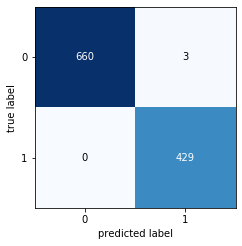

In [ ]:
## otra libreria para graficar la matriz de confusion y hace todo automatico
#!pip3 install mlxtend
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=confusion_matrix(
    y_test, y_pred), figsize=(6, 6), show_normed=False)
plt.tight_layout(pad=10)  # cuadra ancho de la matriz

La matriz de confusión con datos de test presenta una diagonal principal con la mayoria de instancias clasificadas correctamente, positivos $660$ y negativos $429$. 

Por oto lado no hay falsos positivos, y solo 3 falsos negativos, lo cual parece ser un modelo bueno para predecir el movimiento del robot hacia adelante (`target_Move-Forward`)

A continuación se calcula la matriz de confusión con los datos de entrenamiento, para propositos de ilustración.

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[2554,   34],
       [   2, 1774]])

Observese que al calcular la matriz de confusion con los datos de entrenamiento (train), aparecen $2$ casos como falsos positivos y $34$ como falsos negativos. Es decir según el resultado, el modelo se comporta mejor en el conjunto de test que en el conjunto train.

> Este resultado es extraño, dado que espero mejor desempeño en el de entrenamiento. Pero puede indicar buena generalización del modelo obtenido.

## Otras métricas


In [ ]:
# Modulo para realizar la metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, RocCurveDisplay, auc


In [ ]:
accuracy_train_ = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print('Exactitud del modelo con datos de entrenamiento: ', accuracy_train_)
print('Exactitud del modelo con datos de validación: ', accuracy_test)


Exactitud del modelo con datos de entrenamiento:  0.9917506874427131
Exactitud del modelo con datos de validación:  0.9972527472527473


La metrica de exactitud (Accuracy) es mejor evitarla, no funciona con clases desbalanceadas.

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Donde $TP$ es true positive, $TN$ es true negative ,$FP$ es false positive y $FP$ es false positive, indica que:


> Mejor usar en clases desbalanceadas precision, recall y F1.

In [ ]:
precision_score(y_test, y_pred)

0.9930555555555556

La métrica de precisión, 

$$ Precision = \frac{TP}{TP+FP} = \frac{429}{429+3} = 0.99$$

Donde $TP$ es true positive, $FP$ es false positive, indica que:

> El valor de $0.99$ me indica que de todas las instancias clasificadas como movimiento hacia adelante (`target_Move-Forward`), $\approx 100\%$ fue clasificada de forma correcta, es decir, el movimiento del robot hacia adelante esta bien clasificado en casi el total de las instancias en el grupo de datos de test.

Esta métrica es la importante en nuestro caso, ya que relaciona la proporcion de clasificaciones para variable verdadera.

In [ ]:
recall_score(y_test, y_pred)

1.0

La métrica de recall (sensivility, exhaustividad)

$$Recall = \frac{TP}{TP + FN}$$

Donde $FN$ es false negative, indica que:

> Dado que no hay falsos negativos, el valor de recall igual a 1, me indica un modelo que clasifica todos los movimentos hacia adelante.

In [ ]:
roc_auc_score(y_test, y_pred)
## Error bajo la curva, ideal es 1, me predice bien el 100% de las instancias

0.997737556561086

El area bajo la curva me indica que el modelo clasifica el 100% de las instancias de forma correcta. 

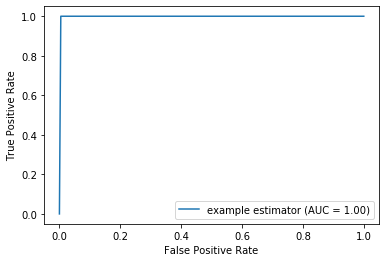

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

Aunque el modelo me permite determinar muy bien el movimiento hacia adelante es necesario hacer una clasificación multiclase. 

Una opción es crear varios modelos, iguales al presentado hasta ahora, uno para cada tipo de movimiento,

| Movimiento | Instancias |
|---------------|----------|
|Move-Forward  |       2205|
|Sharp-Right-Turn    | 2097|
|Slight-Right-Turn   |  826|
|Slight-Left-Turn    |  328|

Así la predicción consistiría de 4 modelos ejecutandose en 'paralelo', sin embargo, si hay conflicto donde dos modelos clasifiquen la lectura de forma positiva, por ejemplo Move-Forward  y Sharp-Right-Turn, se clasifican al mismo tiempo, que movimiento seria el real??